In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Data set consisting of inputs to logical gates and corresponding label(s).
input = np.array([[0,0],[0,1],[1,0],[1,1]]) 
t_and = np.array([0,0,0,1])  
#t_or = np.array([0,1,1,1])
#t_nand = np.array([1,1,1,0])
#t_nor = np.array([1,0,0,0])
#t_xor = np.array([0,1,1,0])

In [99]:
# Define a sigmoid activation function.
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Define a derivative of the sigmoid activation function.
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

In [100]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # Initialize random weights and a random bias term.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # Set learning rate to 0.5.
        self.alpha = 0.5
        
    def forward_step(self, inputs):
        self.inputs = inputs
        # Calculate the drive (weighted sum) of the neuron.
        self.drive = np.dot(inputs, self.weights) + self.bias
        # Activate the neuron. 
        return sigmoid(self.drive)
        
    def update(self, error_signal):
        # Update the parameters (weights and bias) of the perceptron.
        # Compute gradients for weights and bias.
        gradient_weights = error_signal * self.inputs
        gradient_bias = error_signal
        # Update weights and bias.
        self.weights -=  self.alpha * gradient_weights
        self.bias -= self.alpha * gradient_bias

In [101]:
class MLP:
        # Initialize MLP hidden layer that consists of 4 Perceptrons.
    def __init__(self):
        self.hidden_layer = [
            Perceptron(2),
            Perceptron(2),
            Perceptron(2),
            Perceptron(2)
        ]
        # Initialize the output neuron.
        self.output_neuron = Perceptron(4)
        # Initialize a variable to store the activation of the output neuron. 
        self.output = 0
        
    def forward_step(self, inputs):
        # Calculate the drive and activations for the hidden layer.
        hidden_l = np.array([p.forward_step(inputs) for p in self.hidden_layer])
        # Reshape the resulting array to feed it to the output layer (output neuron).
        hidden_l = np.reshape(hidden_l, newshape=(-1))
        # Activation of the output neuron stored in self.output variable.
        self.output = self.output_neuron.forward_step(hidden_l)
        
    def backprop_step(self, inputs, target):
        # Error signal for the output layer.
        output_error_signal = - (target - self.output) * sigmoidprime(self.output_neuron.drive)
        # Update the parameters of the output neuron.
        self.output_neuron.update(output_error_signal)
        # Error signal for the hidden layer.
        hidden_error_signal = [output_error_signal * sigmoidprime(p.drive) * self.output_neuron.weights[i] 
                         for i, p in enumerate(self.hidden_layer)]
        # Update the parameters of the hidden layer.
        for i,p in enumerate(self.hidden_layer):
            p.update(hidden_error_signal[i])

In [102]:
# Initialize MLP.
mlp = MLP()
# Initialize lists to store epochs, loss, accuracy.
epochs=[]
losses=[]
accuracies=[]

for i in range(1000):
    epochs.append(i)
    
    accuracy = 0
    loss = 0
    
    # Training.
    for i in range(4):
        x = input[i]
        t = t_and[i]   
        
        mlp.forward_step(x)
        
        mlp.backprop_step(x,t)
        
        # Loss function for training (squared error), where t is a target
        # and mlp.output is the activation of the output neuron.
        loss += (t-mlp.output)**2
        accuracy += int(float(mlp.output>=0.5) == t)
        
    accuracies.append(accuracy/4.0)
    losses.append(loss)

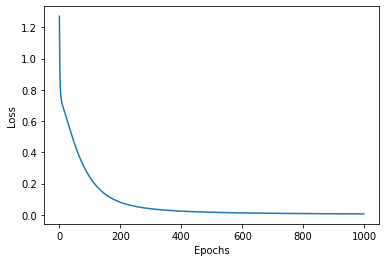

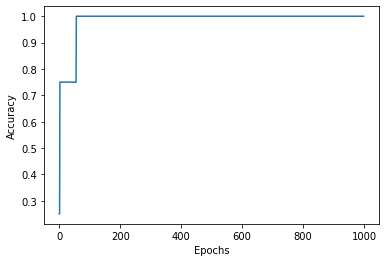

In [103]:
plt.figure()
plt.plot(epochs,losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs,accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()